In [1]:
#Common Conditions
using PyPlot, CompEcon, BasisMatrices
a,b = 0, 1
num_rows, num_cols = 3, 3
n = num_rows*num_cols
x = linspace(a,b,1001)
h = (b - a)/(n - 1)

0.125

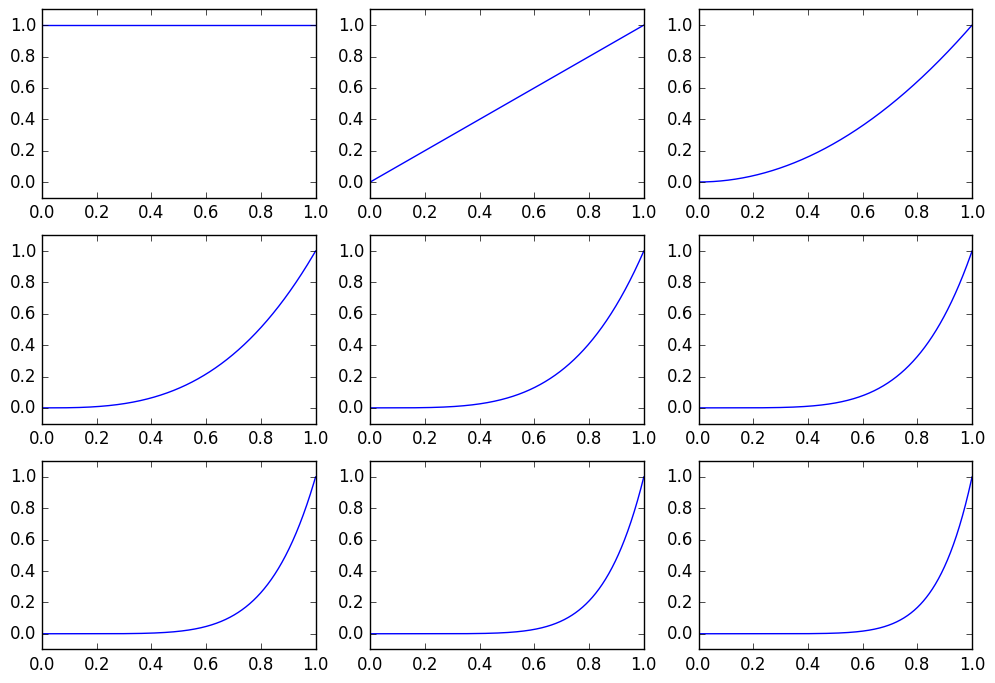

In [3]:
#Figure 6.3
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        y = map(x -> x^(plot_n - 1), x)
        ax[:plot](x,y)
        ax[:set_ylim]([-0.1, 1.1]) 
    end
end

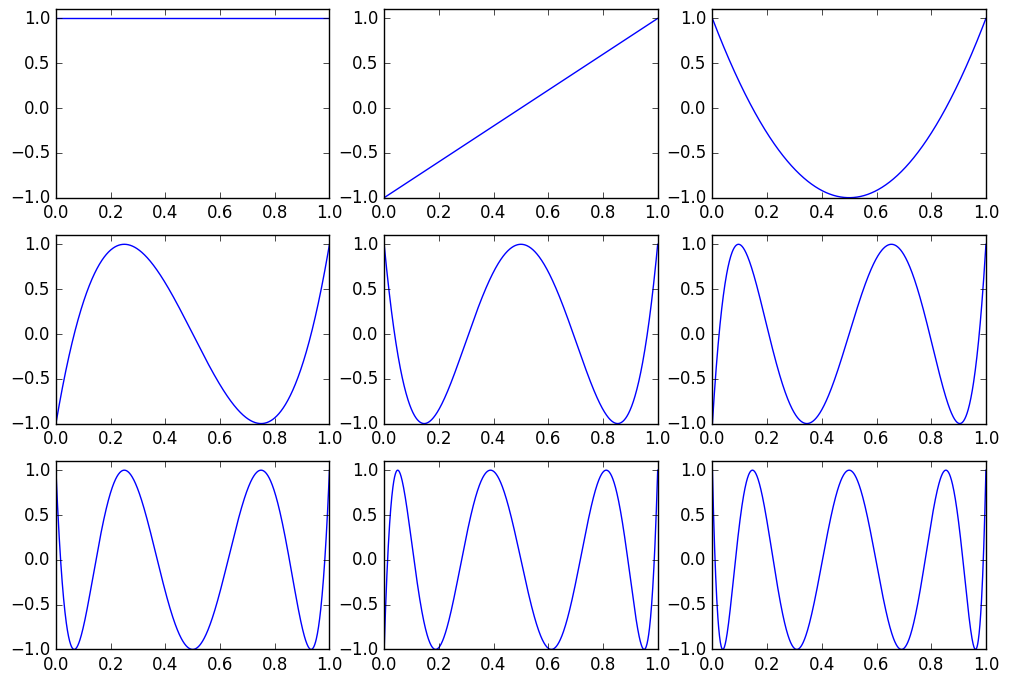

In [4]:
#Figure 6.4(using CompEcon's object)
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
fspace = fundefn(:cheb, n, 0, 1)
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        c = zeros(n)
        c[plot_n] = 1
        y = funeval(c, fspace, x)
        ax[:plot](x,y[1])
        ax[:set_ylim]([-1, 1.1]) 
    end
end

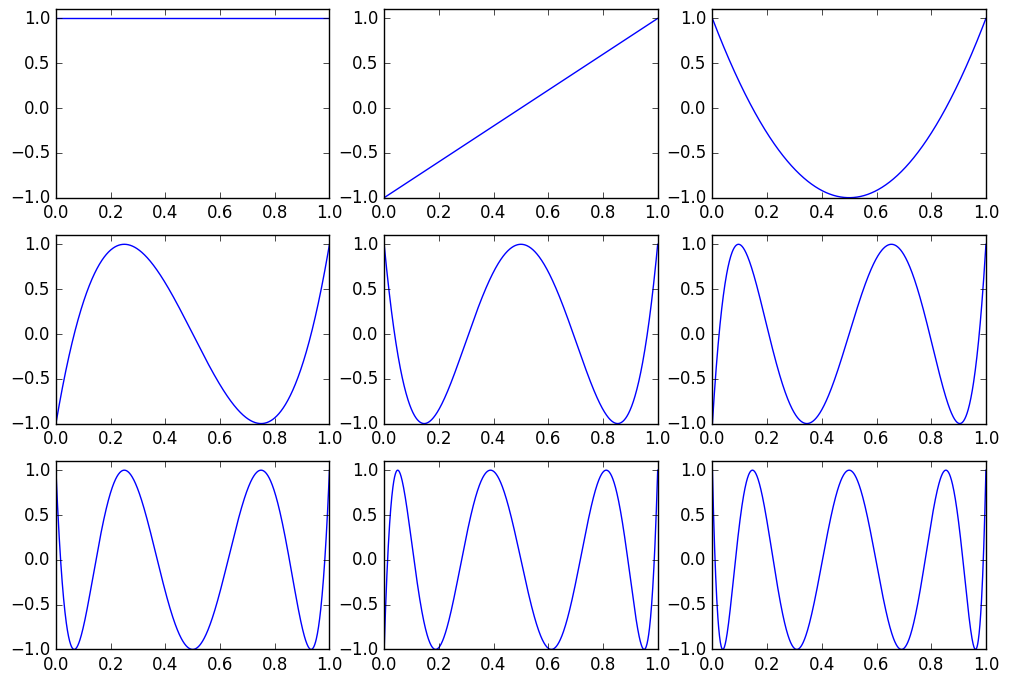

In [5]:
#Figure 6.4(Full Scratch)
#functionを直接arrayに収納してフィボナッチ的に参照する方法だれかやってみて
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))

#reserving coefficients in 2-dim array
coefs = zeros(Int, 9,9)
coefs[1,1] = 1
coefs[2,2] = 1
for ind in 3:9
    for nyan in 1:9
        if nyan > 1
            coefs[nyan, ind] = 2 * coefs[nyan - 1, ind-1] - coefs[nyan, ind-2]
        else
            coefs[nyan, ind] = - coefs[nyan, ind-2]
        end
    end
end

z = [2*(x_elm - a)/(b - a) - 1 for x_elm in x]

for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        y = zeros(1001)
        for (ind, z_elm) in enumerate(z)
            for mltp in 1:9
                y[ind] += coefs[mltp,plot_n]*(z_elm^(mltp - 1))
            end
        end
        ax[:plot](x,y)
        ax[:set_ylim]([-1, 1.1])
    end
end

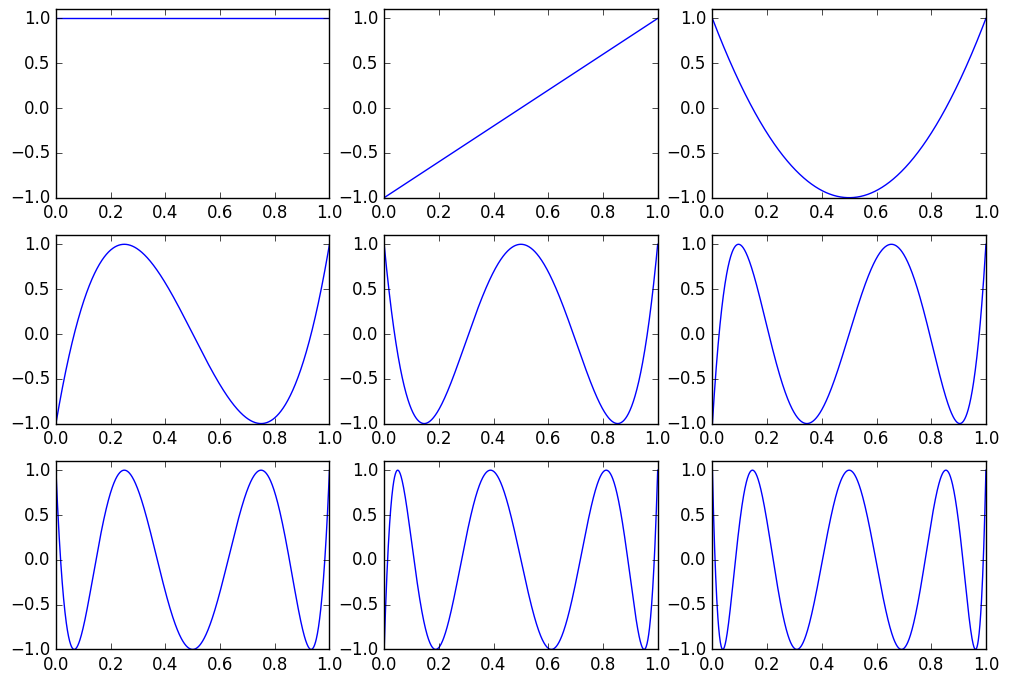

In [6]:
#FIg 6.4(using BasisMatrices)
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
basis = Basis(ChebParams(n,0,1))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        c = zeros(n)
        c[plot_n] = 1
        y = funeval(c, basis, collect(x))
        ax[:plot](x,y)
        ax[:set_ylim]([-1, 1.1]) 
    end
end

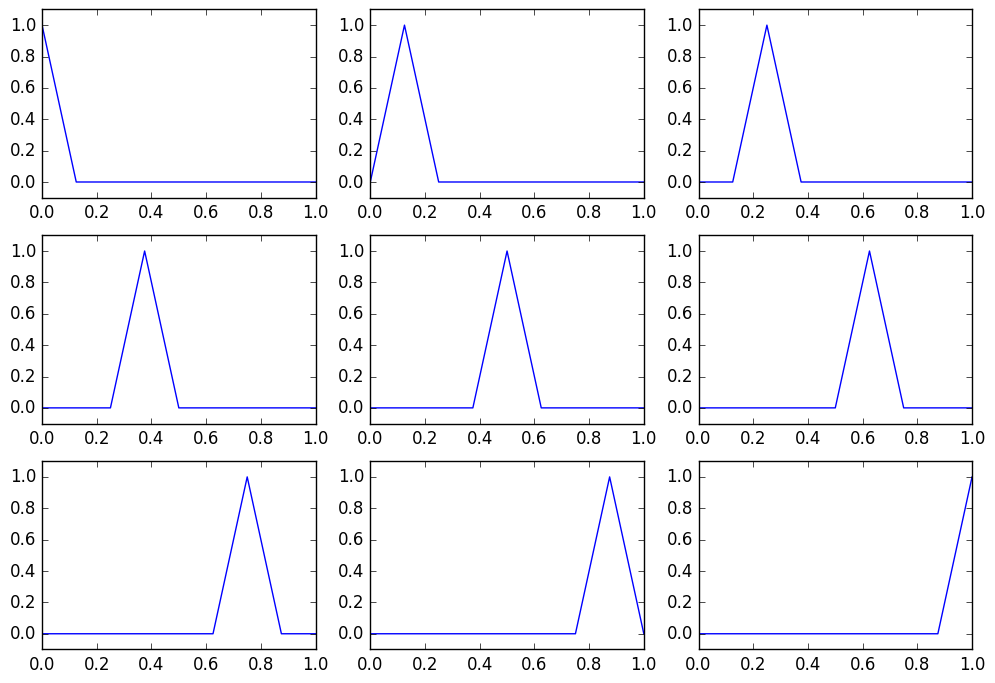

In [7]:
#Figure 6.5(scratch)
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        nu = a + (plot_n - 1)*h
        #Juliaの内包表記でif文は使えない？
        #y = [1 - abs(x_elm - nu)/h if x_elm - nu < h else 0 for x_elm in x]
        y = [abs(x_elm - nu) < h ? 1 - abs(x_elm - nu)/h : 0 for x_elm in x]
        #y = zeros(1001)
        #for (ind, x_elm) in enumerate(x)
        #    if abs(x_elm - nu) < h
        #        y[ind] = 1 - abs(x_elm - nu)/h 
        #end
        ax[:plot](x,y)
        ax[:set_ylim]([-0.1, 1.1]) 
    end
end

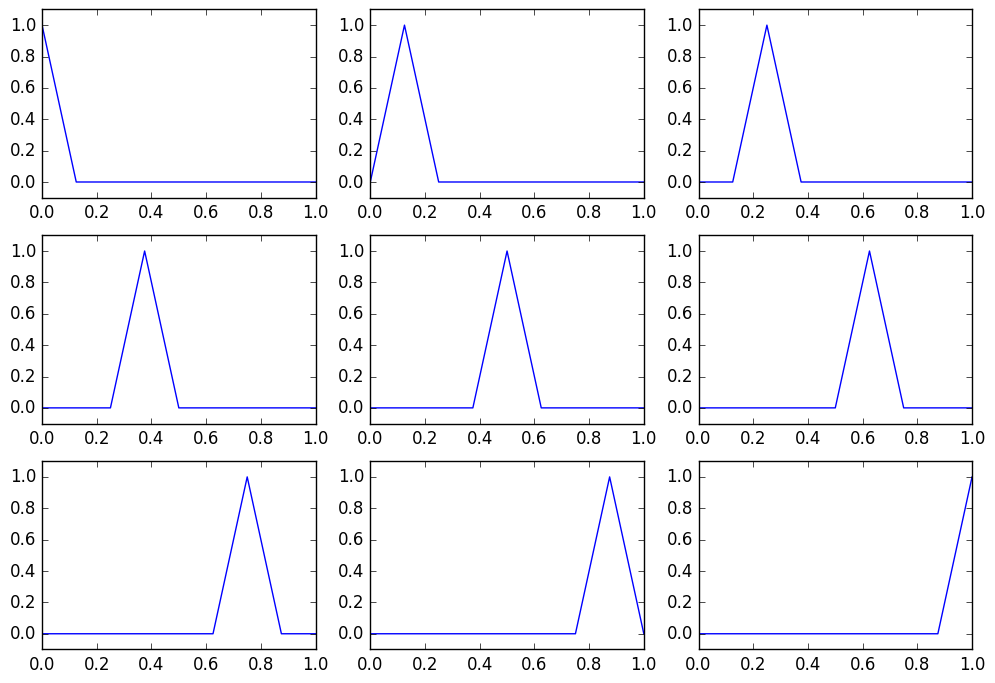

In [8]:
#FIg 6.5(using BasisMatrices)
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
k = 1
basis = Basis(SplineParams(n-(k-1),0,1, k))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        c = zeros(n)
        c[plot_n] = 1
        y = funeval(c, basis, collect(x))
        ax[:plot](x,y)
        ax[:set_ylim]([-.1, 1.1]) 
    end
end

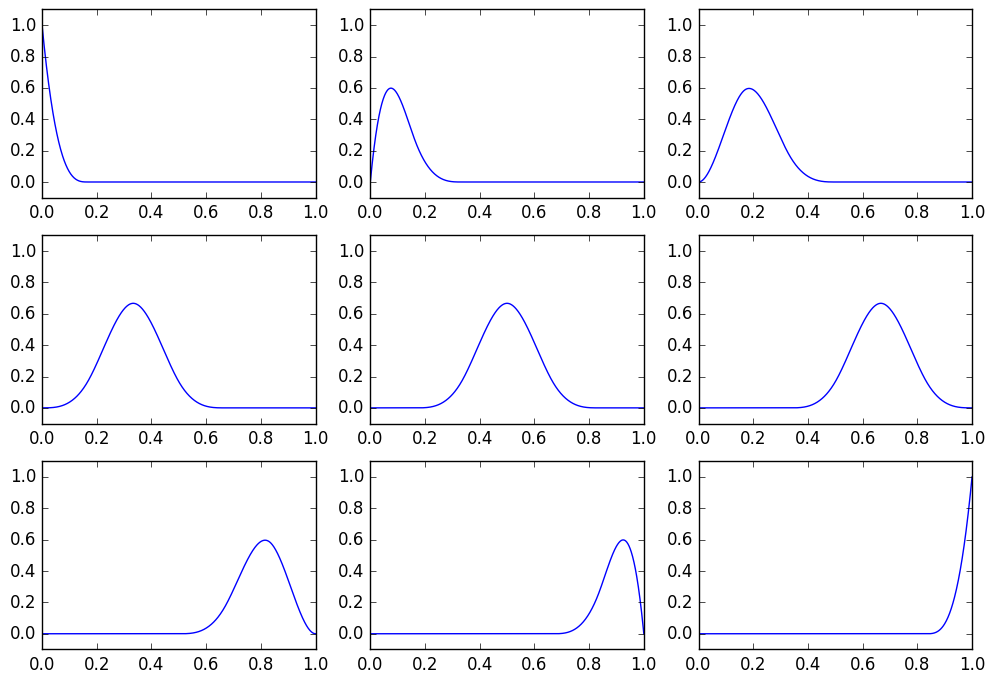

In [9]:
#Figure 6.6(using BasisMatrices' object)
plot_n = 0
fig, axes = subplots(num_rows, num_cols,figsize=(12, 8))
k = 3
basis = Basis(SplineParams(n-(k-1),0,1, k))
for i in 1:num_rows
    for j in 1:num_cols
        plot_n += 1
        ax = axes[i, j]
        c = zeros(n)
        c[plot_n] = 1
        y = funeval(c, basis, collect(x))
        ax[:plot](x,y)
        ax[:set_ylim]([-.1, 1.1]) 
    end
end

In [10]:
#Figure 6.6(だれかスクラッチで書いてくだちぃ)

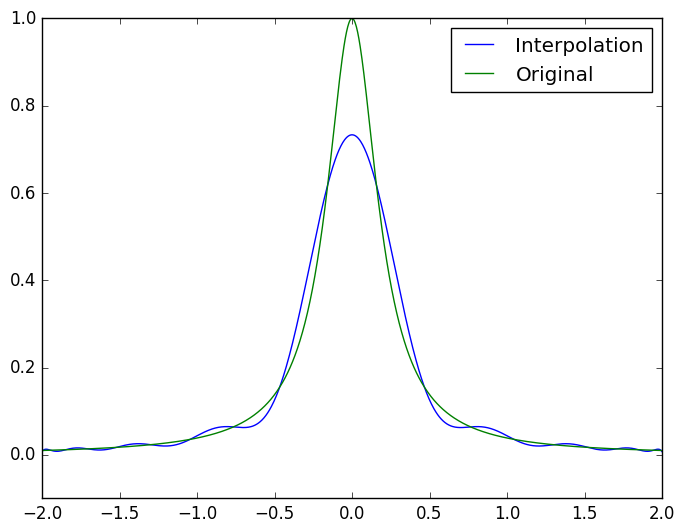

(-0.1,1)

In [11]:
#Approximation with cheb's basis for Runge Function

Runge(x) = 1 ./ (1 + 25 * x .^2)

fspace_Runge = fundefn(:cheb, 20, -2, 2)
c_Runge = funfitf(fspace_Runge, Runge)
x_Runge = linspace(-2, 2, 1001)
y_Runge = funeval(c_Runge, fspace_Runge, x_Runge)
fig, ax = subplots()
ax[:plot](x_Runge,y_Runge[1], label = "Interpolation")
ax[:plot](x_Runge,Runge(x_Runge), label = "Original")
ax[:legend]()
ax[:set_xlim]((-2,2))
ax[:set_ylim]((-0.1, 1))

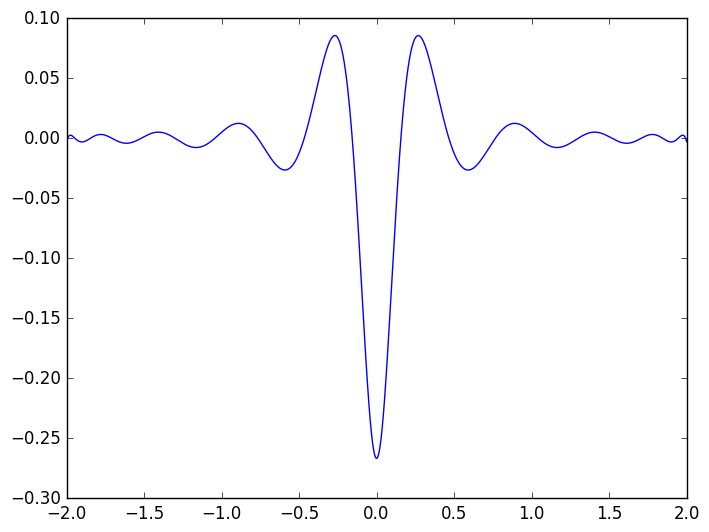

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32090d4a8>

In [12]:
# And it's error
err = y_Runge[1] - Runge(x_Runge)
fig, ax = subplots()
ax[:plot](x_Runge ,err, label = "Interpolation")